In [43]:
import pandas as pd
import seaborn as sns
import glob, os
import numpy as np

import matplotlib as mpl
mpl.rcParams['font.family'] = 'serif'
font_path = mpl.get_data_path() + '/fonts/ttf/cmr10.ttf'
cmfont = mpl.font_manager.FontProperties(fname=font_path)
mpl.rcParams['font.serif'] = cmfont.get_name()
mpl.rcParams['font.size'] = 16
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['axes.unicode_minus'] = False

In [62]:
df_input_spc_raw = pd.concat(map(pd.read_csv, glob.glob(os.path.join('', "data/spc/output_0.csv"))))
df_input_spc_raw['ans'] = 'spc'
df_input_spc_raw['frac'] = df_input_spc_raw['m'] / df_input_spc_raw['n']
#df_input_spc = df_input_spc_raw[df_input_spc_raw['n']//2 == df_input_spc_raw['m']]
df_input_spc = df_input_spc_raw[df_input_spc_raw['m'] == 1]
df_input_mcp = pd.concat(map(pd.read_csv, glob.glob(os.path.join('', "data/mcp/output_0.csv.old"))))
df_input_mcp['ans'] = 'mcp'
df_input_mcp = df_input_mcp[df_input_mcp['l'] == 2000]

df = pd.concat([df_input_mcp, df_input_spc])

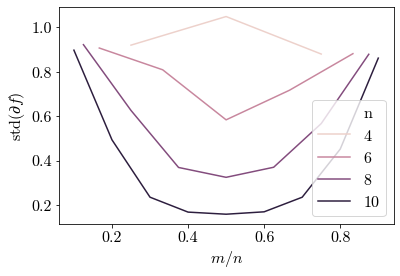

In [63]:
ax = sns.lineplot(
    x='frac',
    y='std',
    hue='n',
    data=df_input_spc_raw
)
ax.set_xlabel(r'$m / n$')
ax.set_ylabel(r'std$(\partial f)$')
ax.legend(loc='lower right')

Text(0, 0.5, 'std$(\\partial f)$')

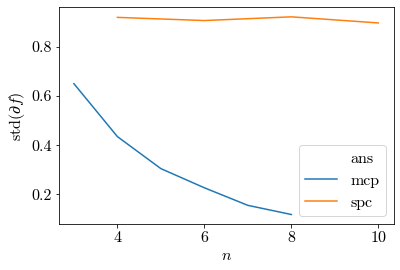

In [57]:
ax = sns.lineplot(
    data=df,
    x='n',
    hue='ans',
    y='std'
)
ax.set_xlabel(r'$n$')
ax.set_ylabel(r'std$(\partial f)$')

Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.


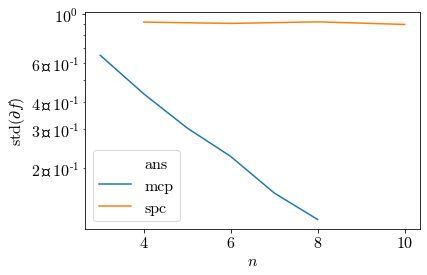

In [59]:
ax = sns.lineplot(
    data=df,
    x='n',
    y='std',
    hue='ans'
)

ax.set_xlabel(r'$n$')
ax.set_ylabel(r'std$(\partial f)$')

ax.set_yscale('log')